In [11]:
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

In [12]:
#필기 숫자 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#6만개 학습용 입력 데이터 포맷을 float32 1이하 숫자로 reshape
X_train = X_train.reshape(60000, 784).astype("float32") / 255.0
#1만개 테스트용 입력 데이터 포맷을 float32 1이하 숫자로.
X_test = X_test.reshape(10000, 784).astype("float32") / 255.0
#Target 값 설정
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [13]:
model = Sequential([
    Dense(32, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='sgd',
              metrics=['accuracy'])

In [15]:
#실제 학습용 데이터로 학습시킴, 반복횟수 5, 웨이트 업데이트 시키는 데이터 단위 32개
model.fit(X_train, y_train, epochs=5, batch_size=32)

#테스트 데이터로 결과 평가하기
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)

print("Loss & Metrics : " + str(loss_and_metrics))

# 학습결과 저장
model.save('mnist_mlp_model.h5')

Epoch 1/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.7104 - accuracy: 0.8127 

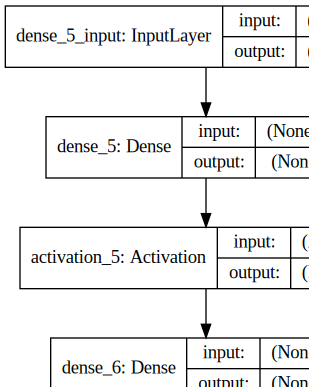

In [16]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.models import load_model

#학습결과 불러오기
model = load_model('mnist_mlp_model.h5')

#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 명령
%matplotlib inline
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))